# Redoing $\sigma$ calculation for only the stars in the bulge

In [1]:
import sys
from brahma_analysis import *
from scipy.interpolate import interp1d
sys.path.append('/home/yja6qa/arepo_package/')

import arepo_package
import scipy.interpolate
import h5py
import os
import numpy as np
import plotting
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d

%matplotlib inline
radiative_efficiency=0.2

# New method: Gravitational potential gradient, calculating $j_{circ}$ at given radius

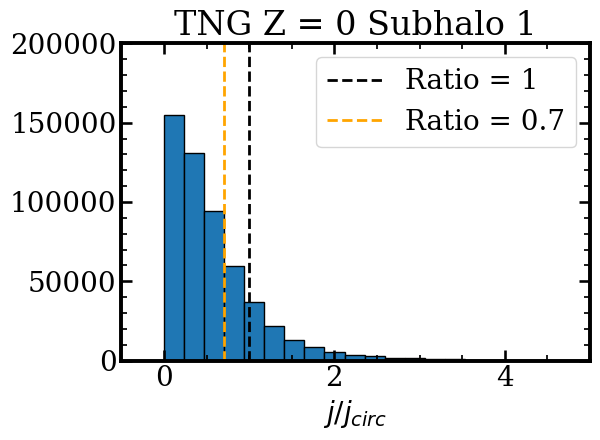

In [56]:
plt.hist(ratio[~np.isnan(ratio)],bins=350,edgecolor='black')
plt.vlines(1,0,200000,color = 'black',ls='--',lw=2,label = 'Ratio = 1')
plt.vlines(0.7,0,200000,color = 'orange',ls='--',lw=2,label = 'Ratio = 0.7')
plt.xlim(-0.5,5)
plt.ylim(0,200000)
plt.title('TNG Z = 0 Subhalo 1')
plt.xlabel('$j/j_{circ}$')
plt.legend()
plt.tight_layout()
plt.savefig('Plots/TNGz0_J_Jcirc_1.pdf')

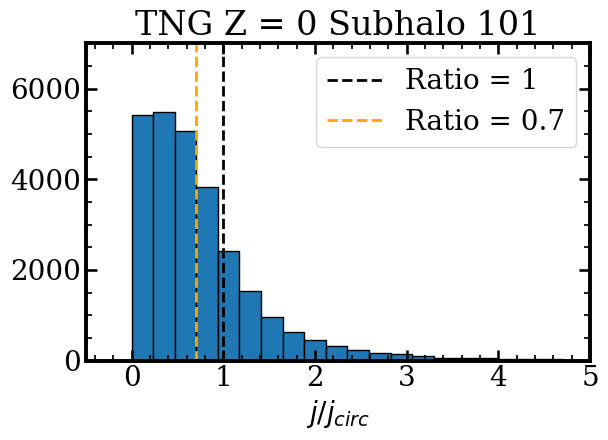

In [69]:
plt.hist(ratio[~np.isnan(ratio)],bins=150,edgecolor='black')
plt.vlines(1,0,7000,color = 'black',ls='--',lw=2,label = 'Ratio = 1')
plt.vlines(0.7,0,7000,color = 'orange',ls='--',lw=2,label = 'Ratio = 0.7')
plt.xlim(-0.5,5)
plt.ylim(0,7000)
plt.title('TNG Z = 0 Subhalo 101')
plt.xlabel('$j/j_{circ}$')
plt.legend()
plt.tight_layout()
plt.savefig('Plots/TNGz0_J_Jcirc_101.pdf')

# Comparing TNG z=0 with and without kinematic decomp:

In [2]:
# TNGz0=ReadBrahmaData('Brahma_Data/TNG_z0')
TNGz0decomp = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0')

In [3]:
TNGpath='/standard/torrey-group/IllustrisTNG/Runs/L75n1820TNG'
basePath = TNGpath
snap_num=99 # z=0
subhalo_id = 0
hdr  = il.groupcat.loadHeader(TNGpath, snap_num)
h = hdr['HubbleParam'] ## load in h from the header
box_size = hdr["BoxSize"]
redshift = hdr['Redshift']

In [4]:
Ratios,Sigmas,BH_Masses,Coords,Star_Masses,pos,grad = TNGz0decomp[0],TNGz0decomp[1],TNGz0decomp[2],TNGz0decomp[3],TNGz0decomp[4],TNGz0decomp[5],TNGz0decomp[6]
Sigmas = np.sqrt( np.array(Sigmas)[:,0]**2 + np.array(Sigmas)[:,1]**2 + np.array(Sigmas)[:,2]**2 ) 
BH_Masses = np.array(BH_Masses)*1e10/h
kpc2km = 3.0857e16
Coords = [np.array(Coords[i])/kpc2km for i in range(len(Coords))]

In [8]:
disks = [len(Ratios[i][(Ratios[i] > 0.7) & (Ratios[i] < 1.3)])/len(Ratios[i]) for i in range(len(Ratios))]

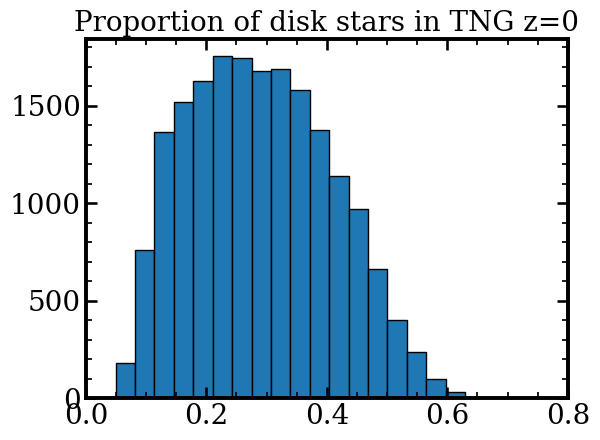

In [9]:
plt.hist(disks,bins=20,edgecolor='black')
plt.title('Proportion of disk stars in TNG z=0',size=20)
plt.xlim(0,0.8)
plt.tight_layout()
plt.savefig('Plots/Prop_disks.png')

In [8]:
# Binning as above for Illustris and Illustris TNG
Sigma_TNGz0 = np.sqrt(np.array(TNGz0[4])[:,0]**2 + np.array(TNGz0[4])[:,1]**2 + np.array(TNGz0[4])[:,2]**2 )

M_TNG = np.array(TNGz0[0])
bins=np.linspace(0.6,2.7,10)

Bulge_Means,Bulge_StdDevs,Bulge_xpoints = cal_avg(Sigmas,np.array(BH_Masses),bins)
bins=np.linspace(0.61,2.71,10)

TNG_Means,TNG_StdDevs,TNG_xpoints = cal_avg(Sigma_TNGz0,M_TNG,bins)


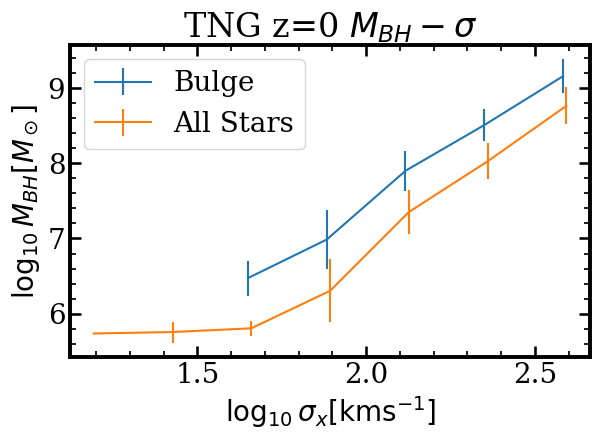

In [9]:
plt.errorbar(Bulge_xpoints,Bulge_Means,Bulge_StdDevs,label='Bulge')
plt.errorbar(TNG_xpoints,TNG_Means,TNG_StdDevs,label='All Stars')
plt.title('TNG z=0 $M_{BH}-\sigma$')
plt.xlabel('$\log_{10} \sigma_x \mathrm{[km s^{-1}]}$')
plt.ylabel('$\log_{10} M_{BH} [M_\odot]$')
plt.legend()
plt.tight_layout()
plt.savefig('Plots/TNG_MSigma_Bulge_comparison.png')

Want to plot ratio of j_z/j_circ to radial distance: if our decomposition is working properly, we should see a positive trend!

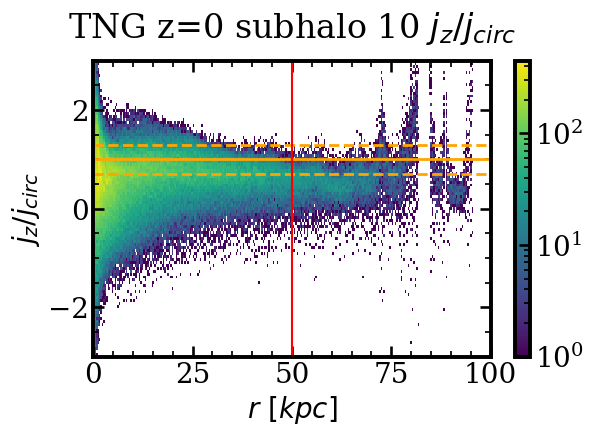

In [143]:
index=10
r = np.array([np.sqrt(Coords[index][i][0]**2 + Coords[index][i][1]**2) for i in range(len(Coords[index]))])
fig,ax=plt.subplots()
no_nans = ~np.isnan(Ratios[index])

counts1, xedges1, yedges1, im1 = ax.hist2d(r[no_nans],Ratios[index][no_nans],norm='log',bins=500)
fig.colorbar(im1, ax=ax)
ax.hlines([0.7,1.3],0,100,color='orange',lw=2,ls = '--')
ax.hlines(1,0,100,color='orange',lw=2)
ax.vlines(50,-3,3,color='red')
ax.set_ylim(-3,3)
ax.set_xlim(0,100)
plt.xlabel('$r\ [kpc]$')
plt.ylabel('$j_z/j_{circ}$')
plt.title('TNG z=0 subhalo 10 $j_z/j_{circ}$',y=1.05)
plt.tight_layout()
plt.savefig('Plots/jz_jcirc_TNG_subhalo_{}.png'.format(index))

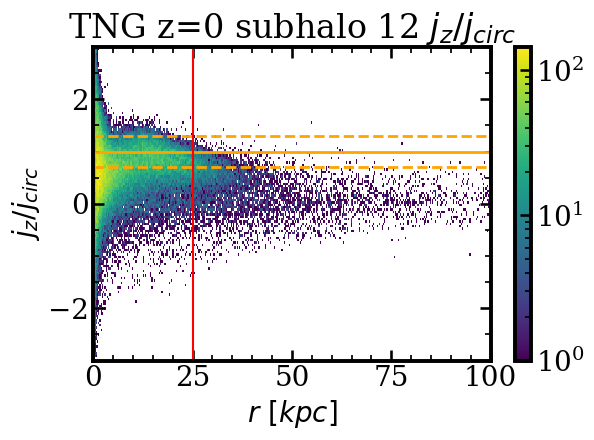

In [153]:
index=12
r = np.array([np.sqrt(Coords[index][i][0]**2 + Coords[index][i][1]**2) for i in range(len(Coords[index]))])
fig,ax=plt.subplots()

counts1, xedges1, yedges1, im1 = ax.hist2d(r[~np.isnan(Ratios[index])],Ratios[index][~np.isnan(Ratios[index])],
                                           norm='log',bins=500)
fig.colorbar(im1, ax=ax)
ax.hlines([0.7,1.3],0,100,color='orange',lw=2,ls = '--')
ax.hlines(1,0,100,color='orange',lw=2)
ax.vlines(25,-3,3,color='red')
plt.xlim(0,100)
plt.ylim(-3,3)
plt.xlabel('$r\ [kpc]$')
plt.ylabel('$j_z/j_{circ}$')
plt.title('TNG z=0 subhalo 12 $j_z/j_{circ}$')
plt.tight_layout()
plt.savefig('Plots/jz_jcirc_TNG_subhalo_{}.png'.format(index))

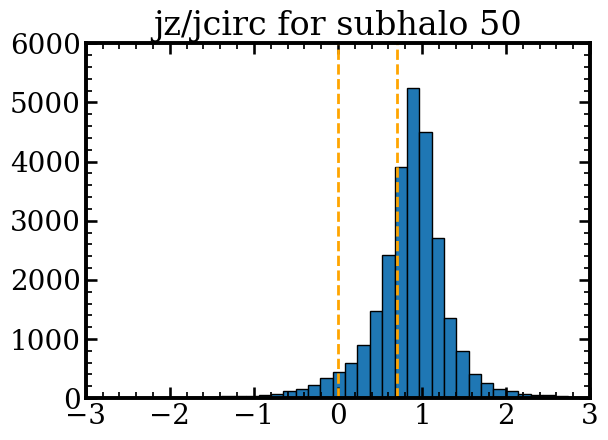

In [155]:
plt.hist(Ratios[50],bins=200,edgecolor='black')
plt.vlines([0,0.7],0,20000,color='orange',lw=2,ls='--')
plt.ylim(0,6000)
plt.xlim(-3,3)
plt.title('jz/jcirc for subhalo 50')
plt.tight_layout()
plt.savefig('Plots/TNGz0_J_Jcirc_50.pdf')

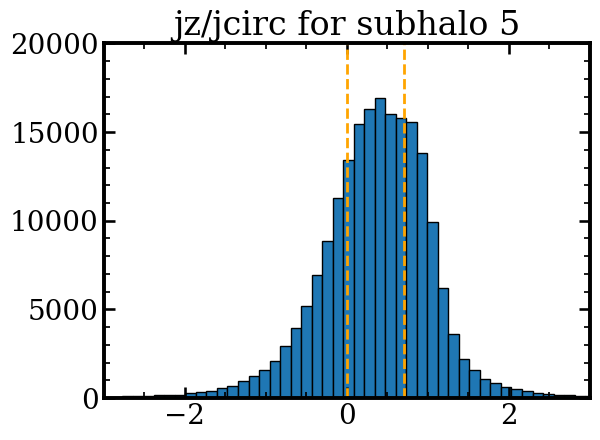

In [156]:
plt.hist(Ratios[5],bins=250,edgecolor='black')
plt.vlines([0,0.7],0,20000,color='orange',lw=2,ls='--')
plt.ylim(0,20000)
plt.xlim(-3,3)
plt.title('jz/jcirc for subhalo 5')
plt.tight_layout()
plt.savefig('Plots/TNGz0_J_Jcirc_5.pdf')

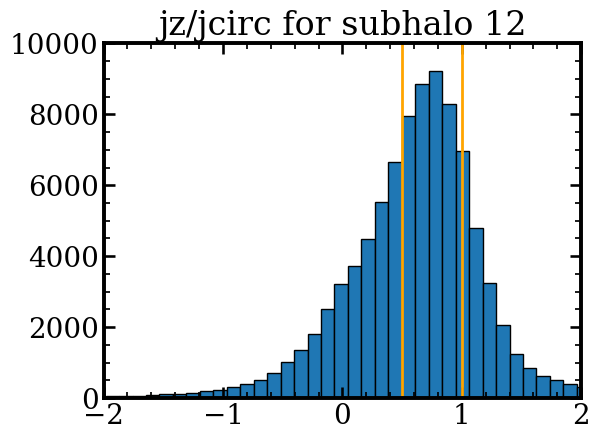

In [7]:
plt.hist(Ratios[12],bins=200,edgecolor='black')
plt.vlines([0.5,1],0,10000,color='orange',lw=2)
plt.ylim(0,10000)
plt.xlim(-2,2)
plt.title('jz/jcirc for subhalo 12')
plt.tight_layout()
plt.savefig('Plots/TNGz0_J_Jcirc_12.pdf')

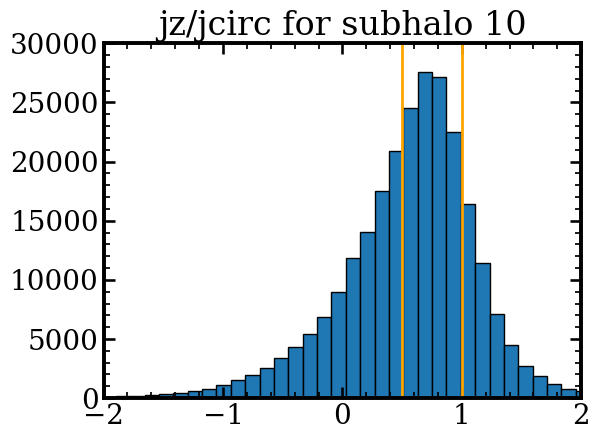

In [12]:
plt.hist(Ratios[10],bins=250,edgecolor='black')
plt.vlines([0.5,1],0,50000,color='orange',lw=2)
plt.ylim(0,30000)
plt.xlim(-2,2)
plt.title('jz/jcirc for subhalo 10')
plt.tight_layout()
plt.savefig('Plots/TNGz0_J_Jcirc_10.pdf')

# Making spatial plots to show stars that have been identified as part of the disk and bulge

In [13]:
disks = [(Ratios[i] > 0.7) & (Ratios[i] < 1.3) for i in range(len(Ratios))]
bulges = [Ratios[i] < 0.7 for i in range(len(Ratios))]

Arrays: Ratios,Sigmas,BH_Masses,Coords,Star_Masses

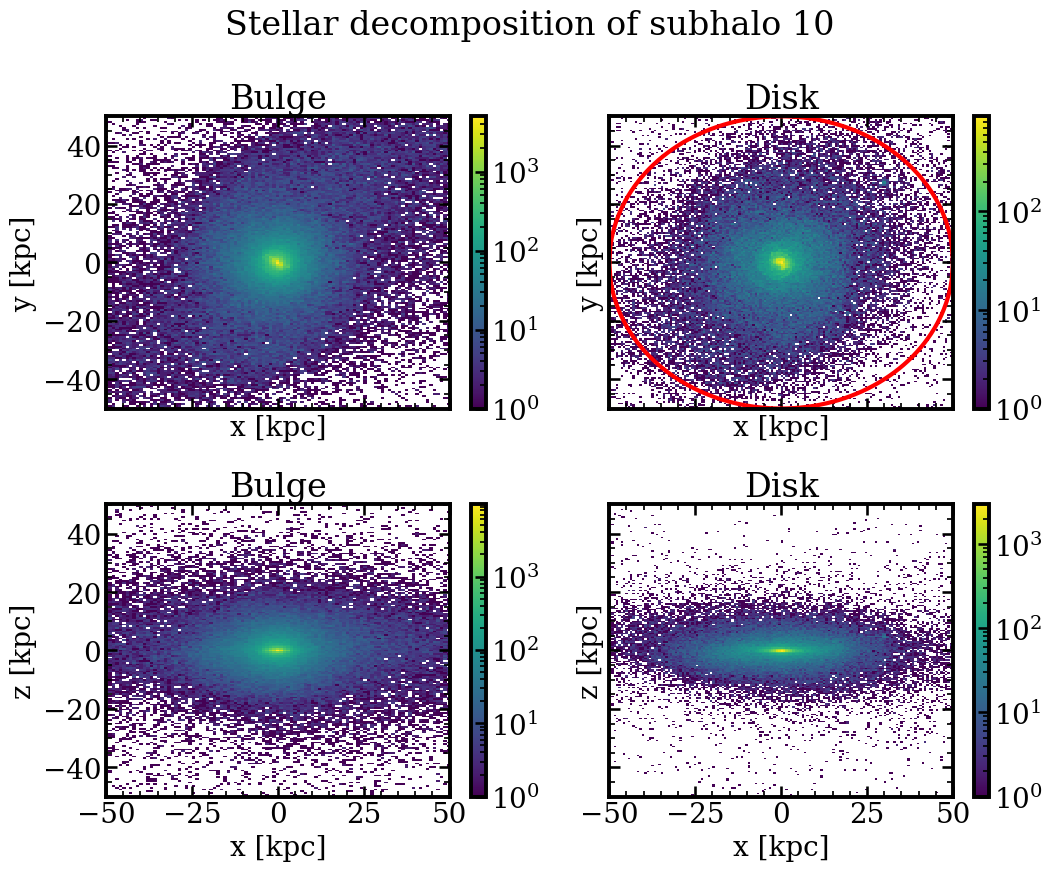

In [16]:
i = 10
rcrit = 50

x = np.linspace(-rcrit,rcrit,300)
y1 = np.sqrt(rcrit**2 - x**2)
y2 = -np.sqrt(rcrit**2 - x**2)

Bulge = Coords[i][bulges[i]]
Disk = Coords[i][disks[i]]

fig,axs=plt.subplots(2,2,figsize = (11,9),sharex=True,sharey=True)

# counts1, xedges1, yedges1, im1 = ax.hist2d(Coords[i][:,0],Coords[i][:,1],norm='log',bins=100)
counts1, xedges1, yedges1, im1 = axs[0,0].hist2d(Bulge[:,0],Bulge[:,1],norm='log',bins=300)
counts2, xedges2, yedges2, im2 = axs[0,1].hist2d(Disk[:,0],Disk[:,1],norm='log',bins=300)
axs[0,1].plot(x,y1,color='red',lw=3)
axs[0,1].plot(x,y2,color='red',lw=3)
axs[0,0].set_title('Bulge')
axs[0,1].set_title('Disk')
axs[0,0].set_xlabel('x [kpc]')
axs[0,1].set_xlabel('x [kpc]')
axs[0,0].set_ylabel('y [kpc]')
axs[0,1].set_ylabel('y [kpc]')

counts3, xedges3, yedges3, im3 = axs[1,0].hist2d(Bulge[:,0],Bulge[:,2],norm='log',bins=300)
counts4, xedges4, yedges4, im4 = axs[1,1].hist2d(Disk[:,0],Disk[:,2],norm='log',bins=300)

axs[1,0].set_title('Bulge')
axs[1,1].set_title('Disk')
axs[1,0].set_xlabel('x [kpc]')
axs[1,1].set_xlabel('x [kpc]')
axs[1,0].set_ylabel('z [kpc]')
axs[1,1].set_ylabel('z [kpc]')

for ax in axs.flatten():
    ax.set_xlim(-50,50)
    ax.set_ylim(-50,50)
    
fig.colorbar(im1, ax=axs[0,0])
fig.colorbar(im2, ax=axs[0,1])
fig.colorbar(im3, ax=axs[1,0])
fig.colorbar(im4, ax=axs[1,1])

fig.suptitle('Stellar decomposition of subhalo {}'.format(i))

fig.tight_layout()
fig.savefig('Plots/Subhalo_{}_decomp.png'.format(i))

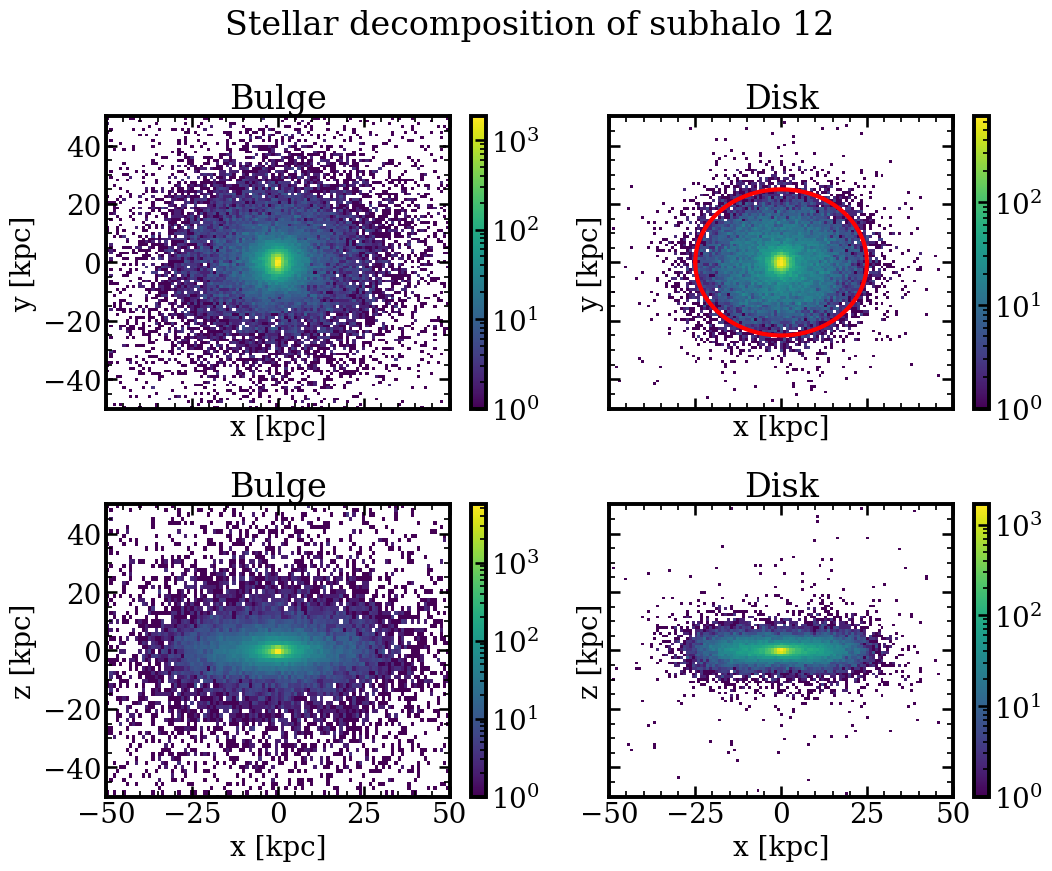

In [17]:
i = 12
rcrit = 25

x = np.linspace(-rcrit,rcrit,300)
y1 = np.sqrt(rcrit**2 - x**2)
y2 = -np.sqrt(rcrit**2 - x**2)

Bulge = Coords[i][bulges[i]]
Disk = Coords[i][disks[i]]

fig,axs=plt.subplots(2,2,figsize = (11,9),sharex=True,sharey=True)

# counts1, xedges1, yedges1, im1 = ax.hist2d(Coords[i][:,0],Coords[i][:,1],norm='log',bins=100)
counts1, xedges1, yedges1, im1 = axs[0,0].hist2d(Bulge[:,0],Bulge[:,1],norm='log',bins=300)
counts2, xedges2, yedges2, im2 = axs[0,1].hist2d(Disk[:,0],Disk[:,1],norm='log',bins=300)
axs[0,1].plot(x,y1,color='red',lw=3)
axs[0,1].plot(x,y2,color='red',lw=3)
axs[0,0].set_title('Bulge')
axs[0,1].set_title('Disk')
axs[0,0].set_xlabel('x [kpc]')
axs[0,1].set_xlabel('x [kpc]')
axs[0,0].set_ylabel('y [kpc]')
axs[0,1].set_ylabel('y [kpc]')

counts3, xedges3, yedges3, im3 = axs[1,0].hist2d(Bulge[:,0],Bulge[:,2],norm='log',bins=300)
counts4, xedges4, yedges4, im4 = axs[1,1].hist2d(Disk[:,0],Disk[:,2],norm='log',bins=300)

axs[1,0].set_title('Bulge')
axs[1,1].set_title('Disk')
axs[1,0].set_xlabel('x [kpc]')
axs[1,1].set_xlabel('x [kpc]')
axs[1,0].set_ylabel('z [kpc]')
axs[1,1].set_ylabel('z [kpc]')

for ax in axs.flatten():
    ax.set_xlim(-50,50)
    ax.set_ylim(-50,50)
    
fig.colorbar(im1, ax=axs[0,0])
fig.colorbar(im2, ax=axs[0,1])
fig.colorbar(im3, ax=axs[1,0])
fig.colorbar(im4, ax=axs[1,1])

fig.suptitle('Stellar decomposition of subhalo {}'.format(i))

fig.tight_layout()
fig.savefig('Plots/Subhalo_{}_decomp.png'.format(i))

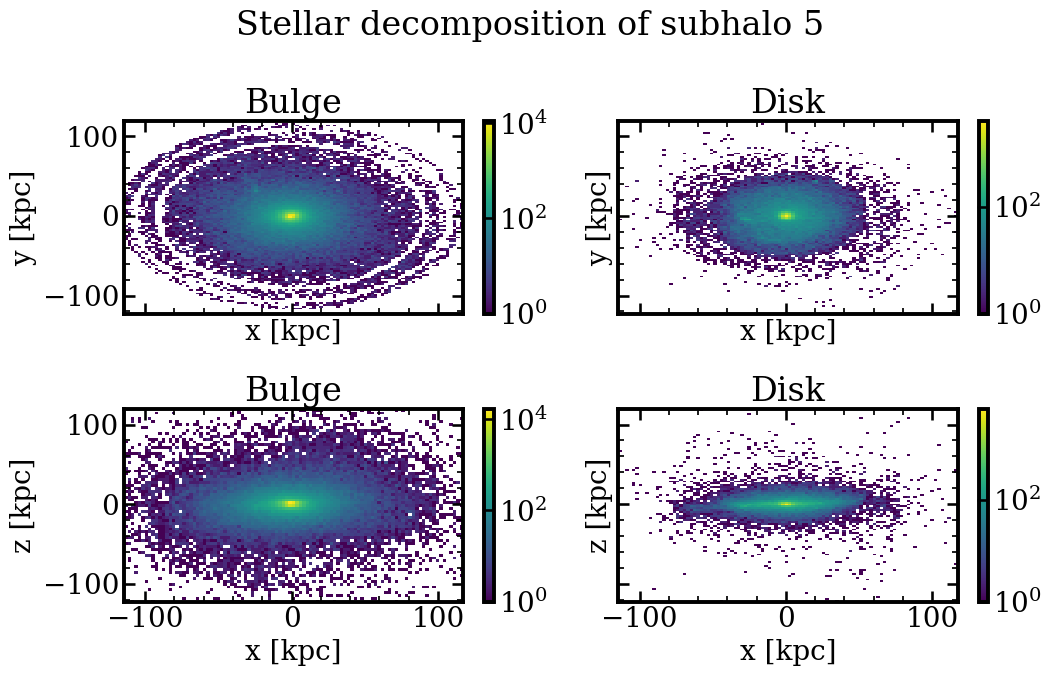

In [91]:
i = 5

Bulge = Coords[i][bulges[i]]
Disk = Coords[i][disks[i]]

fig,axs=plt.subplots(2,2,figsize = (11,7),sharex=True,sharey=True)

# counts1, xedges1, yedges1, im1 = ax.hist2d(Coords[i][:,0],Coords[i][:,1],norm='log',bins=100)
counts1, xedges1, yedges1, im1 = axs[0,0].hist2d(Bulge[:,0],Bulge[:,1],norm='log',bins=100)
counts2, xedges2, yedges2, im2 = axs[0,1].hist2d(Disk[:,0],Disk[:,1],norm='log',bins=100)
axs[0,0].set_title('Bulge')
axs[0,1].set_title('Disk')
axs[0,0].set_xlabel('x [kpc]')
axs[0,1].set_xlabel('x [kpc]')
axs[0,0].set_ylabel('y [kpc]')
axs[0,1].set_ylabel('y [kpc]')

counts3, xedges3, yedges3, im3 = axs[1,0].hist2d(Bulge[:,0],Bulge[:,2],norm='log',bins=100)
counts4, xedges4, yedges4, im4 = axs[1,1].hist2d(Disk[:,0],Disk[:,2],norm='log',bins=100)

axs[1,0].set_title('Bulge')
axs[1,1].set_title('Disk')
axs[1,0].set_xlabel('x [kpc]')
axs[1,1].set_xlabel('x [kpc]')
axs[1,0].set_ylabel('z [kpc]')
axs[1,1].set_ylabel('z [kpc]')

fig.colorbar(im1, ax=axs[0,0])
fig.colorbar(im2, ax=axs[0,1])
fig.colorbar(im3, ax=axs[1,0])
fig.colorbar(im4, ax=axs[1,1])

fig.suptitle('Stellar decomposition of subhalo {}'.format(i))

fig.tight_layout()
fig.savefig('Plots/Subhalo_{}_decomp.png'.format(i))

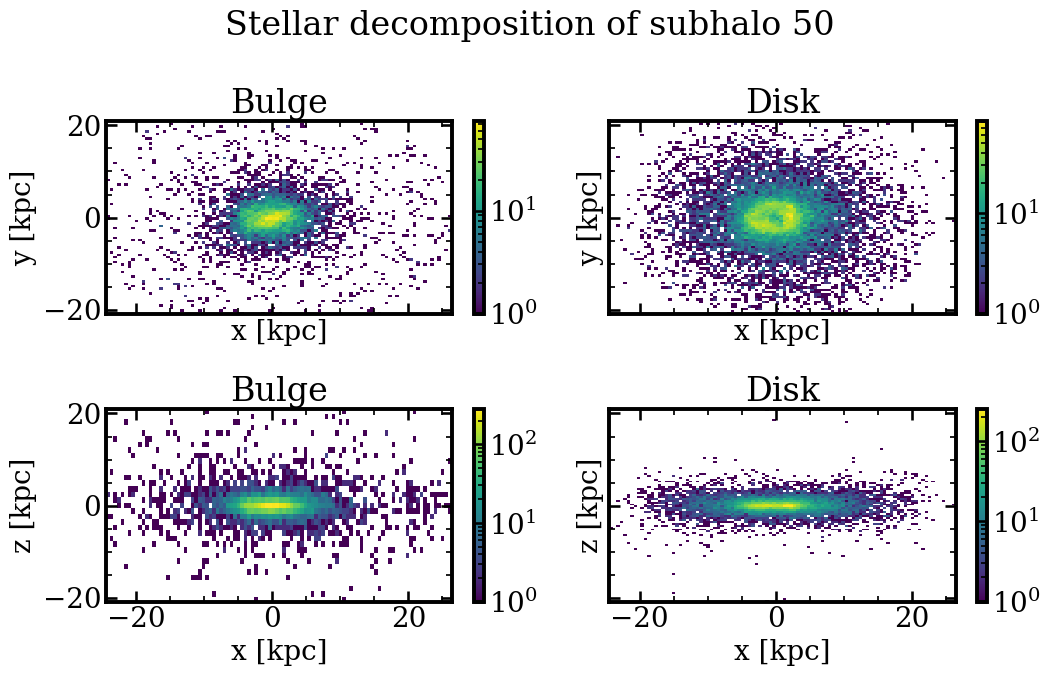

In [92]:
i = 50

Bulge = Coords[i][bulges[i]]
Disk = Coords[i][disks[i]]

fig,axs=plt.subplots(2,2,figsize = (11,7),sharex=True,sharey=True)

# counts1, xedges1, yedges1, im1 = ax.hist2d(Coords[i][:,0],Coords[i][:,1],norm='log',bins=100)
counts1, xedges1, yedges1, im1 = axs[0,0].hist2d(Bulge[:,0],Bulge[:,1],norm='log',bins=100)
counts2, xedges2, yedges2, im2 = axs[0,1].hist2d(Disk[:,0],Disk[:,1],norm='log',bins=100)
axs[0,0].set_title('Bulge')
axs[0,1].set_title('Disk')
axs[0,0].set_xlabel('x [kpc]')
axs[0,1].set_xlabel('x [kpc]')
axs[0,0].set_ylabel('y [kpc]')
axs[0,1].set_ylabel('y [kpc]')

counts3, xedges3, yedges3, im3 = axs[1,0].hist2d(Bulge[:,0],Bulge[:,2],norm='log',bins=100)
counts4, xedges4, yedges4, im4 = axs[1,1].hist2d(Disk[:,0],Disk[:,2],norm='log',bins=100)

axs[1,0].set_title('Bulge')
axs[1,1].set_title('Disk')
axs[1,0].set_xlabel('x [kpc]')
axs[1,1].set_xlabel('x [kpc]')
axs[1,0].set_ylabel('z [kpc]')
axs[1,1].set_ylabel('z [kpc]')

fig.colorbar(im1, ax=axs[0,0])
fig.colorbar(im2, ax=axs[0,1])
fig.colorbar(im3, ax=axs[1,0])
fig.colorbar(im4, ax=axs[1,1])

fig.suptitle('Stellar decomposition of subhalo {}'.format(i))

fig.tight_layout()
fig.savefig('Plots/Subhalo_{}_decomp.png'.format(i))

# Now with j_z/j_circ = 0.5 cutoff:

In [2]:
# TNGz0=ReadBrahmaData('Brahma_Data/TNG_z0')
TNGz0decomp_5 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_r0.5')

TNGpath='/standard/torrey-group/IllustrisTNG/Runs/L75n1820TNG'
basePath = TNGpath
snap_num=99 # z=0
subhalo_id = 0
hdr  = il.groupcat.loadHeader(TNGpath, snap_num)
h = hdr['HubbleParam'] ## load in h from the header
box_size = hdr["BoxSize"]
redshift = hdr['Redshift']

In [3]:
Ratios1,Ratios2,Ratios3,Sigmas1,Sigmas2,BH_Masses,Coords,Star_Masses,Pot_radii,Pot_grads,e_bind_norms,Central_ids,Subhalo_vels = TNGz0decomp_5[0],TNGz0decomp_5[1],TNGz0decomp_5[2],TNGz0decomp_5[3],TNGz0decomp_5[4],TNGz0decomp_5[5],TNGz0decomp_5[6],TNGz0decomp_5[7],TNGz0decomp_5[8],TNGz0decomp_5[9],TNGz0decomp_5[10],TNGz0decomp_5[11],TNGz0decomp_5[12]
Sigmas1 = np.sqrt( np.array(Sigmas1)[:,0]**2 + np.array(Sigmas1)[:,1]**2 + np.array(Sigmas1)[:,2]**2 ) 
Sigmas2 = np.sqrt( np.array(Sigmas2)[:,0]**2 + np.array(Sigmas2)[:,1]**2 + np.array(Sigmas2)[:,2]**2 ) 
BH_Masses = np.array(BH_Masses)*1e10/h
kpc2km = 3.0857e16
Coords = [np.array(Coords[i])/kpc2km for i in range(len(Coords))]

In [4]:
# Binning as above for Illustris and Illustris TNG
Sigma_TNGz0 = np.sqrt(np.array(TNGz0[4])[:,0]**2+np.array(TNGz0[4])[:,1]**2+np.array(TNGz0[4])[:,2]**2)

M_TNG = np.array(TNGz0[0])
bins=np.linspace(0.6,2.7,10)

Bulge_Means,Bulge_StdDevs,Bulge_xpoints = cal_avg(Sigmas,np.array(BH_Masses),bins)
bins=np.linspace(0.61,2.71,10)

TNG_Means,TNG_StdDevs,TNG_xpoints = cal_avg(Sigma_TNGz0,M_TNG,bins)


/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in divide
 

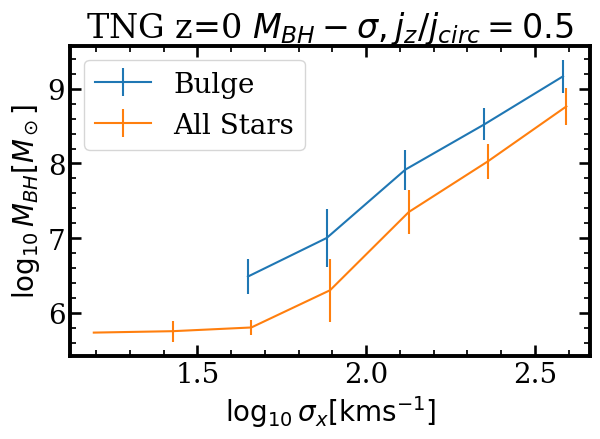

In [5]:
plt.errorbar(Bulge_xpoints,Bulge_Means,Bulge_StdDevs,label='Bulge')
plt.errorbar(TNG_xpoints,TNG_Means,TNG_StdDevs,label='All Stars')
plt.title('TNG z=0 $M_{BH}-\sigma, j_z/j_{circ} = 0.5$')
plt.xlabel('$\log_{10} \sigma_x \mathrm{[km s^{-1}]}$')
plt.ylabel('$\log_{10} M_{BH} [M_\odot]$')
plt.legend()
plt.tight_layout()
plt.savefig('Plots/TNG_MSigma_Bulge_comparison_0.5.png')

## Now: Plotting e/emax vs jz/jcirc like in https://iopscience.iop.org/article/10.3847/1538-4357/ab8fa8/pdf

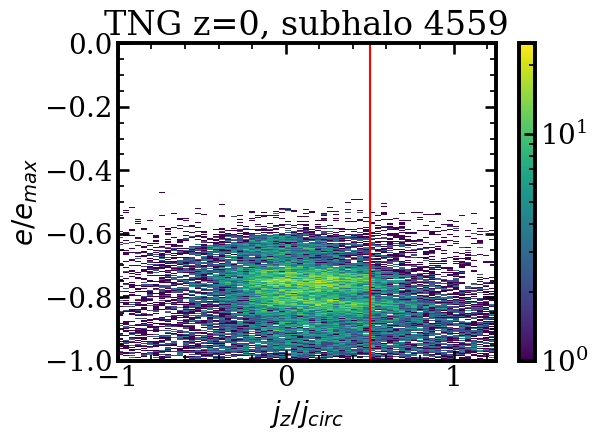

In [86]:
indices = np.where(np.array(Central_ids) != -1)[0]
index=indices[300] # Not actual subhalo index, just index in my list of subhalos
fig,ax=plt.subplots()

no_nans=~np.isnan(Ratios1[index])
counts1, xedges1, yedges1, im1 = ax.hist2d(Ratios1[index][no_nans],e_bind_norms[index][no_nans],norm='log',bins=(2500,1000))

fig.colorbar(im1, ax=ax)
# ax.hlines([0.7,1.3],0,100,color='orange',lw=2,ls = '--')
# ax.hlines(1,0,100,color='orange',lw=2)
ax.vlines(0.5,-1,0,color='red')
plt.xlim(-1,1.25)
plt.ylim(-1,0)
plt.xlabel('$j_z/j_{circ}$')
plt.ylabel('$e/e_{max}$')
plt.title('TNG z=0, subhalo {}'.format(index))
plt.tight_layout()
plt.savefig('Plots/TNG_subhalo_{}_emax_jz.png'.format(index))

In [4]:
disks = [(Ratios[i] > 0.5) & (Ratios[i] < 1.3) for i in range(len(Ratios))]
bulges = [Ratios[i] < 0.5 for i in range(len(Ratios))]

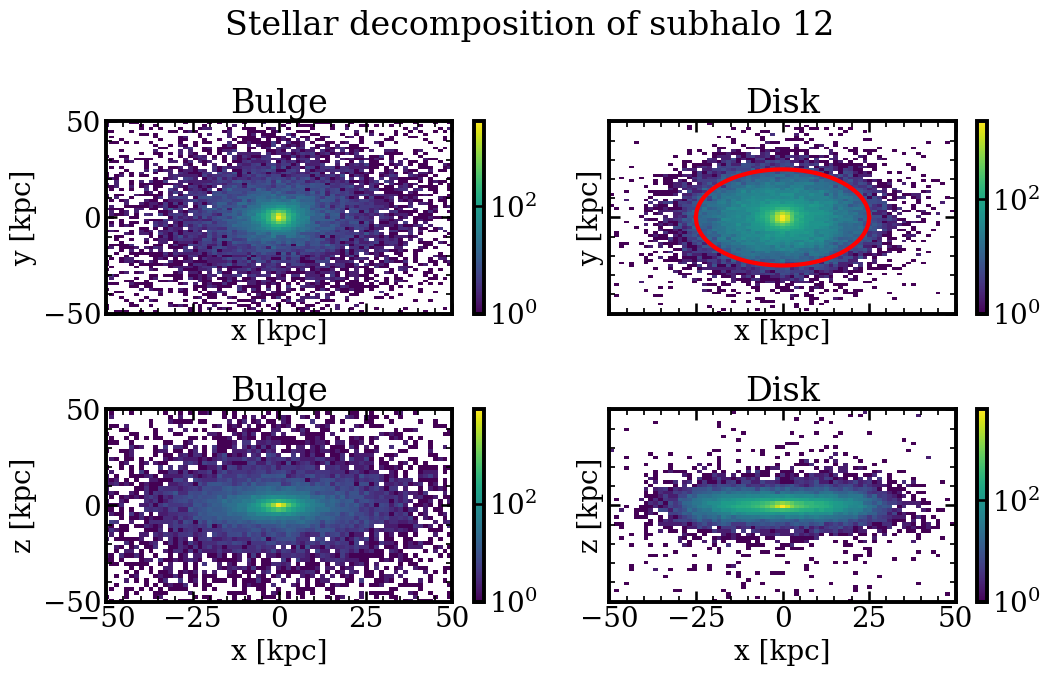

In [8]:
i = 12
rcrit = 25

x = np.linspace(-rcrit,rcrit,300)
y1 = np.sqrt(rcrit**2 - x**2)
y2 = -np.sqrt(rcrit**2 - x**2)

Bulge = Coords[i][bulges[i]]
Disk = Coords[i][disks[i]]

fig,axs=plt.subplots(2,2,figsize = (11,7),sharex=True,sharey=True)

# counts1, xedges1, yedges1, im1 = ax.hist2d(Coords[i][:,0],Coords[i][:,1],norm='log',bins=100)
counts1, xedges1, yedges1, im1 = axs[0,0].hist2d(Bulge[:,0],Bulge[:,1],norm='log',bins=200)
counts2, xedges2, yedges2, im2 = axs[0,1].hist2d(Disk[:,0],Disk[:,1],norm='log',bins=200)
axs[0,1].plot(x,y1,color='red',lw=3)
axs[0,1].plot(x,y2,color='red',lw=3)
axs[0,0].set_title('Bulge')
axs[0,1].set_title('Disk')
axs[0,0].set_xlabel('x [kpc]')
axs[0,1].set_xlabel('x [kpc]')
axs[0,0].set_ylabel('y [kpc]')
axs[0,1].set_ylabel('y [kpc]')

counts3, xedges3, yedges3, im3 = axs[1,0].hist2d(Bulge[:,0],Bulge[:,2],norm='log',bins=200)
counts4, xedges4, yedges4, im4 = axs[1,1].hist2d(Disk[:,0],Disk[:,2],norm='log',bins=200)

axs[1,0].set_title('Bulge')
axs[1,1].set_title('Disk')
axs[1,0].set_xlabel('x [kpc]')
axs[1,1].set_xlabel('x [kpc]')
axs[1,0].set_ylabel('z [kpc]')
axs[1,1].set_ylabel('z [kpc]')

for ax in axs.flatten():
    ax.set_xlim(-50,50)
    ax.set_ylim(-50,50)

fig.colorbar(im1, ax=axs[0,0])
fig.colorbar(im2, ax=axs[0,1])
fig.colorbar(im3, ax=axs[1,0])
fig.colorbar(im4, ax=axs[1,1])

fig.suptitle('Stellar decomposition of subhalo {}'.format(i))

fig.tight_layout()
fig.savefig('Plots/Subhalo_{}_decomp_0.5.png'.format(i))

## Want to plot average e/emax vs jz/jcirc to compare to above paper:

In [87]:
Ratios1 = [Ratios1[i][~np.isnan(Ratios1[i])] for i in range(len(Ratios1))]
Avg_ratios = [np.mean(Ratios1[i]) for i in range(len(Ratios1))]
e_bind_norms = [e_bind_norms[i][(~np.isnan(e_bind_norms[i])) & (e_bind_norms[i]<0)] for i in range(len(e_bind_norms))]
Avg_e = [np.mean(e_bind_norms[i]) for i in range(len(e_bind_norms))]

no_nans = ~np.isnan(Avg_e)

Avg_ratios = np.array(Avg_ratios)[no_nans]
Avg_e = np.array(Avg_e)[no_nans]

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


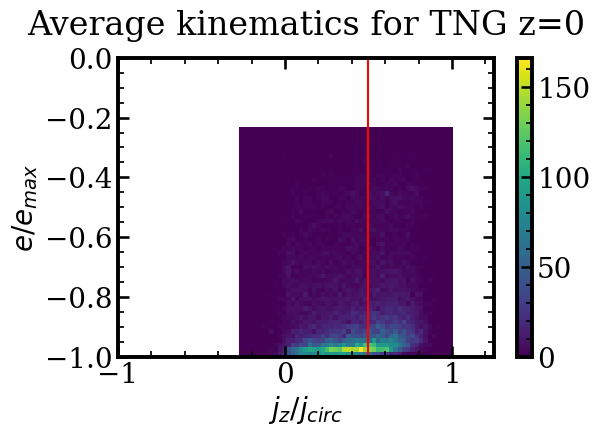

In [89]:
fig,ax=plt.subplots()

counts1, xedges1, yedges1, im1 = ax.hist2d(Avg_ratios,Avg_e,bins=50)

fig.colorbar(im1, ax=ax)
# ax.hlines([0.7,1.3],0,100,color='orange',lw=2,ls = '--')
# ax.hlines(1,0,100,color='orange',lw=2)
ax.vlines(0.5,-1,0,color='red')
plt.xlim(-1,1.25)
plt.ylim(-1,0)
plt.xlabel('$j_z/j_{circ}$')
plt.ylabel('$e/e_{max}$')
plt.title('Average kinematics for TNG z=0',y=1.05)
plt.tight_layout()
#plt.savefig('Plots/TNG_subhalo_{}_emax_jz.png'.format(index))

Didn't do mass-weighted averages... it looks like we are missing the "bulge" component though...

## Plotting distributions for central galaxies:

Need indices to match with 

In [62]:
disks = [(Ratios1[i] > 0.5) & (Ratios1[i] < 1.3) for i in range(len(Ratios1))]
bulges = [Ratios1[i] < 0.5 for i in range(len(Ratios1))]

In [15]:
indices = np.where(np.array(Central_ids) != -1)[0]

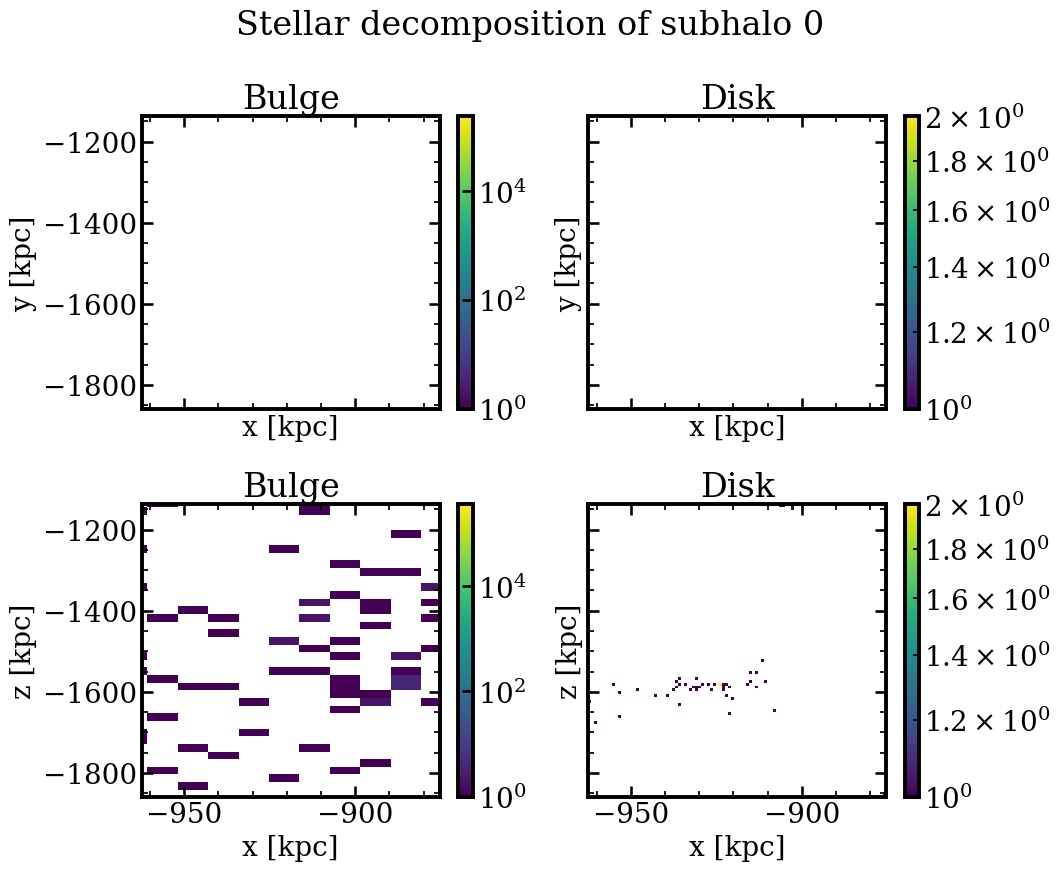

In [64]:
i = indices[0]

Bulge = Coords[i][bulges[i]]
Disk = Coords[i][disks[i]]

fig,axs=plt.subplots(2,2,figsize = (11,9),sharex=True,sharey=True)

counts1, xedges1, yedges1, im1 = axs[0,0].hist2d(Bulge[:,0],Bulge[:,1],norm='log',bins=(250,250))
counts2, xedges2, yedges2, im2 = axs[0,1].hist2d(Disk[:,0],Disk[:,1],norm='log',bins=(100,100))
axs[0,0].set_title('Bulge')
axs[0,1].set_title('Disk')
axs[0,0].set_xlabel('x [kpc]')
axs[0,1].set_xlabel('x [kpc]')
axs[0,0].set_ylabel('y [kpc]')
axs[0,1].set_ylabel('y [kpc]')

counts3, xedges3, yedges3, im3 = axs[1,0].hist2d(Bulge[:,0],Bulge[:,2],norm='log',bins=(250,250))
counts4, xedges4, yedges4, im4 = axs[1,1].hist2d(Disk[:,0],Disk[:,2],norm='log',bins=(100,100))

axs[1,0].set_title('Bulge')
axs[1,1].set_title('Disk')
axs[1,0].set_xlabel('x [kpc]')
axs[1,1].set_xlabel('x [kpc]')
axs[1,0].set_ylabel('z [kpc]')
axs[1,1].set_ylabel('z [kpc]')

fig.colorbar(im1, ax=axs[0,0])
fig.colorbar(im2, ax=axs[0,1])
fig.colorbar(im3, ax=axs[1,0])
fig.colorbar(im4, ax=axs[1,1])

fig.suptitle('Stellar decomposition of subhalo {}'.format(i))

fig.tight_layout()
fig.savefig('Plots/Subhalo_{}_decomp_ratio2.png'.format(i))

## Plotting velocity distributions for bulges and disks

Need stellar velocities

In [90]:
disks = [(Ratios1[i] > 0.5) & (Ratios1[i] < 1.3) for i in range(len(Ratios1))]
bulges = [Ratios1[i] < 0.5 for i in range(len(Ratios1))]

In [105]:
np.linalg.norm(Subhalo_vels[100],axis=1)

array([ 21.00664 ,  16.270876,  15.159745, ..., 145.9187  , 172.59401 ,
       145.27966 ], dtype=float32)

In [114]:
len(Subhalo_vels[101])

12089

In [116]:
len(disks[101])

11515

In [115]:
len(bulges[101])

11515

In [102]:
# indices = np.where(np.array(Central_ids) != -1)[0]
index=100# indices[100] 

plt.hist(np.linalg.norm(Subhalo_vels[index],axis=1)[bulges][index])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (18799,) + inhomogeneous part.